# D.C. Residential Properties Future scaling
In this notebook, we will use the D.C. Residential Properties from the kaggle Database to learn how to scale feature data. Scaling means to change the range of values for the data so that features (columns) that have vastly different numerical ranges can be more easily compared. We will look at 2 types of scaling - z-score standardization and Min-max scaling.

In [1]:
import pandas as pd

#preprocessing functions will be used to standardize/normalize data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
filepath = "DC_Properties.csv" 
DCP_df = pd.read_csv(filepath)
DCP_df.head()


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [3]:

#rename the pound/hashtag(#) column so it doesn't cause further issues
DCP_df.rename(columns={'Unnamed: 0': 'Number'}, inplace =True)

In [4]:
#validate
DCP_df.head()

,Number,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [5]:
DCP_df['PRICE']

0         1095000.0
1               NaN
2         2100000.0
3         1602000.0
4               NaN
5         1950000.0
6               NaN
7         1050000.0
8         1430000.0
9               NaN
10              NaN
11              NaN
12              NaN
13              NaN
14        1325000.0
15              NaN
16        1240000.0
17              NaN
18              NaN
19         592250.0
20          33232.0
21              NaN
22         907400.0
23        1065000.0
24        1100000.0
25          20000.0
26              NaN
27         703700.0
28              NaN
29        1210000.0
            ...    
158927          NaN
158928     632400.0
158929     574000.0
158930     365000.0
158931     405000.0
158932     505000.0
158933     520000.0
158934     499900.0
158935     451000.0
158936     564900.0
158937          NaN
158938     660000.0
158939     380000.0
158940          NaN
158941          NaN
158942          NaN
158943     539000.0
158944     908500.0
158945     450000.0


In [6]:
#check if any missing values in the data
DCP_df.count()

Number                158957
BATHRM                158957
HF_BATHRM             158957
HEAT                  158957
AC                    158957
NUM_UNITS             106696
ROOMS                 158957
BEDRM                 158957
AYB                   158686
YR_RMDL                80928
EYB                   158957
STORIES               106652
SALEDATE              132187
PRICE                  98216
QUALIFIED             158957
SALE_NUM              158957
GBA                   106696
BLDG_NUM              158957
STYLE                 106696
STRUCT                106696
GRADE                 106696
CNDTN                 106696
EXTWALL               106696
ROOF                  106696
INTWALL               106696
KITCHENS              106695
FIREPLACES            158957
USECODE               158957
LANDAREA              158957
GIS_LAST_MOD_DTTM     158957
SOURCE                158957
CMPLX_NUM              52261
LIVING_GBA             52261
FULLADDRESS           106040
CITY          

In [8]:

DCPP_df= DCP_df.loc[DCP_df['PRICE'].notnull()]

In [9]:
DCPP_df.count()

Number                98216
BATHRM                98216
HF_BATHRM             98216
HEAT                  98216
AC                    98216
NUM_UNITS             57900
ROOMS                 98216
BEDRM                 98216
AYB                   98104
YR_RMDL               57674
EYB                   98216
STORIES               57867
SALEDATE              98215
PRICE                 98216
QUALIFIED             98216
SALE_NUM              98216
GBA                   57900
BLDG_NUM              98216
STYLE                 57900
STRUCT                57900
GRADE                 57900
CNDTN                 57900
EXTWALL               57900
ROOF                  57900
INTWALL               57900
KITCHENS              57899
FIREPLACES            98216
USECODE               98216
LANDAREA              98216
GIS_LAST_MOD_DTTM     98216
SOURCE                98216
CMPLX_NUM             40316
LIVING_GBA            40316
FULLADDRESS           57565
CITY                  57569
STATE               

In [10]:
DCPP_df['PRICE']

0         1095000.0
2         2100000.0
3         1602000.0
5         1950000.0
7         1050000.0
8         1430000.0
14        1325000.0
16        1240000.0
19         592250.0
20          33232.0
22         907400.0
23        1065000.0
24        1100000.0
25          20000.0
27         703700.0
29        1210000.0
32         130500.0
37         339500.0
40        1050000.0
41        1550000.0
42        1599900.0
43        1700000.0
44        1700000.0
45         450000.0
46         846000.0
48         348500.0
50         849000.0
52        1312000.0
54         390000.0
55         772500.0
            ...    
158918     839000.0
158919     915500.0
158920     880000.0
158921    1120000.0
158924     269000.0
158926     385000.0
158928     632400.0
158929     574000.0
158930     365000.0
158931     405000.0
158932     505000.0
158933     520000.0
158934     499900.0
158935     451000.0
158936     564900.0
158938     660000.0
158939     380000.0
158943     539000.0
158944     908500.0


In [11]:
#descriptive statistics
DCPP_df.describe()

,Number,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,...,USECODE,LANDAREA,CMPLX_NUM,LIVING_GBA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,X,Y
count,98216.000000,98216.000000,98216.000000,57900.000000,98216.000000,98216.000000,98104.000000,57674.000000,98216.000000,57867.000000,...,98216.000000,98216.000000,40316.000000,40316.000000,98216.000000,98216.000000,98216.000000,98216.000000,98115.000000,98115.000000
mean,85324.149802,1.859157,0.444541,1.221071,5.921836,2.606480,1944.903888,2000.666748,1965.759876,2.124667,...,14.613393,2084.296123,2442.438337,882.090907,20012.303525,38.913911,-77.018076,5289.710220,-77.018101,38.913903
std,47633.750491,0.978321,0.576217,0.623997,2.637816,1.393801,36.254098,16.136807,27.500116,3.948764,...,3.683449,2765.429658,1136.998556,406.013673,16.326982,0.030185,0.039794,3288.288804,0.039786,0.030161
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1754.000000,20.000000,1800.000000,0.000000,...,11.000000,0.000000,1001.000000,199.000000,20001.000000,38.819731,-77.113909,100.000000,-77.113135,38.820576
25%,43005.500000,1.000000,0.000000,1.000000,4.000000,2.000000,1917.000000,1991.000000,1954.000000,2.000000,...,11.000000,482.000000,1586.750000,619.000000,20005.000000,38.895973,-77.042758,2201.000000,-77.042768,38.895753
50%,89420.500000,2.000000,0.000000,1.000000,6.000000,3.000000,1939.000000,2005.000000,1965.000000,2.000000,...,13.000000,1380.000000,2282.000000,781.000000,20010.000000,38.914207,-77.021489,5002.000000,-77.021262,38.914181
75%,128346.500000,2.000000,1.000000,1.000000,7.000000,3.000000,1966.000000,2011.000000,1981.000000,2.000000,...,17.000000,2556.000000,2972.000000,1049.000000,20017.000000,38.933797,-76.990601,8100.000000,-76.990849,38.933756
max,158955.000000,12.000000,11.000000,6.000000,31.000000,20.000000,2018.000000,2019.000000,2018.000000,826.000000,...,117.000000,187301.000000,5621.000000,8553.000000,20392.000000,38.995435,-76.909758,11100.000000,-76.910511,38.993646


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C2E296BDD8>,
      dtype=object)

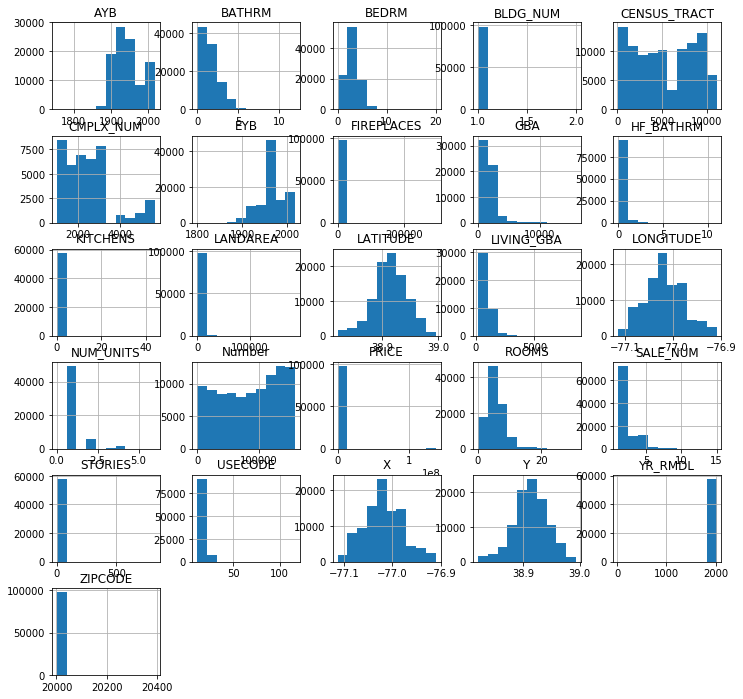

In [12]:
#plot the frequency count for each column
DCPP_df.hist(figsize=(12,12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C2E296B9E8>,
      dtype=object)

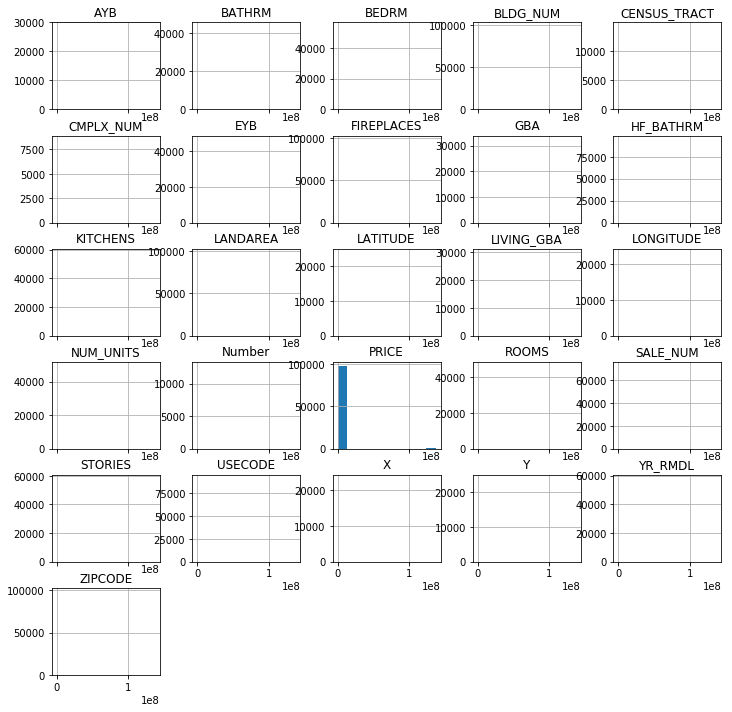

In [13]:
#plot frequency count data but using the same scale (minimum and maximum value out of all columns)
DCPP_df.hist(figsize=(12,12), sharex=True)

# Scaling will help to find any drastic effects that occur in the data when comparing multiple features. If we try to see any effects when putting the features on the same scale in the default data, as in the above charts, smaller values cannot be seen.

Z-score Standardization
Z-score standardization is the process of converting the data to have a mean of 0 and a standard deviation of 1. The z-score is calculcated by subtracting the mean for a feature (column) by each data point value and dividing by the standard deviation.

z=(value−mean)/stddev

In [14]:
#first 5 rows of the 'Glucose' column
DCPP_df['PRICE'].head()

0    1095000.0
2    2100000.0
3    1602000.0
5    1950000.0
7    1050000.0
Name: PRICE, dtype: float64

In [15]:
#Method 1: manual calculation of z-scores for 'PRICE' column

#mean for the column
mean = DCPP_df['PRICE'].mean()

#standard deviation of the column
std = DCPP_df['PRICE'].std()

#each value in column minus the mean and then divide by the standard deviation
PRICE_z_manual = (DCPP_df['PRICE'] - mean)/std

In [16]:
#values for mean and standard deviation of 'PRICE column'
mean, std

(931351.5949336156, 7061324.955612032)

In [17]:
#first 5 rows of z-score standardized 'PRICE' column
PRICE_z_manual.head()

0    0.023175
2    0.165500
3    0.094975
5    0.144257
7    0.016803
Name: PRICE, dtype: float64

In [18]:
#mean and standard deviation of z-score standardized 'PRICE' column
PRICE_z_manual.mean(), PRICE_z_manual.std()

(5.337655258732351e-16, 1.0000000000000109)

In [19]:
#Method 2: use scikit-learn to calculate z-scores

#set StandardScale function to a variable (easier to type)
#scaler will use z-score formula on the column
scaler = StandardScaler()

#fit_transform calculates the mean and std, and replaces any missing values w/ mean if needed
#'Glucose' is in double set of square brackets in order to make it a dataframe
PRICE_zscore = scaler.fit_transform(DCPP_df[['PRICE']])

In [20]:
#mean and standard deviation of z-score standardized 'PRICE' column
PRICE_zscore.mean(), PRICE_zscore.std()

(-4.630074029551846e-18, 1.0)

In [21]:
#because fit_transform made an array, we have to change it back into a Series type (pandas dataframe column)
PRICE_z_col = pd.Series(PRICE_zscore.reshape(-1))

In [22]:
#first 5 rows of z-score standardized price column
PRICE_z_col.head()

0    0.023175
1    0.165501
2    0.094975
3    0.144258
4    0.016803
dtype: float64

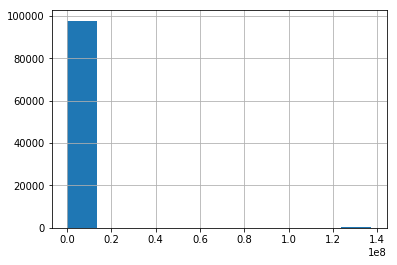

In [23]:
#BEFORE: frequency count plot of 'price' column
DCPP_df['PRICE'].hist()

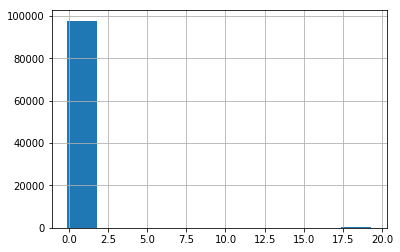

In [24]:
#AFTER: frequency count plot of 'price' column (z-score standardization)
#range is much smaller
PRICE_z_col.hist()

# Min-max Scaling
Max-min scaling transforms the data into a range from 0 to 1. The new minimum value of the column will always be 0 and the new maximum value of the column will always be 1. The values in between are calculated by using the original value and subtracting the column's minimum value, then dividing by the maximum value of the column minus the minimum value.

m=(value−min)/max−min


In [25]:
#MinMaxScaler function will calculate the formula
minmax_sc = MinMaxScaler()

In [26]:
#use MinMaxScaler function and fit_transform function on the 'price' column
PRICE_minmax = minmax_sc.fit_transform(DCPP_df[['PRICE']])

In [27]:
#mean and standard deviation of Min-Max 'Glucose' column
PRICE_minmax.mean(), PRICE_minmax.std()

(0.006777030046710401, 0.0513819049810315)

In [28]:
#convert array into a dataframe column
#look at first 5 rows of min-max values
PRICE_mm_col = pd.Series(PRICE_minmax.reshape(-1))
PRICE_mm_col.head()

0    0.007968
1    0.015281
2    0.011657
3    0.014189
4    0.007640
dtype: float64

In [29]:
#verify the range is between 0 and 1
PRICE_mm_col.min(), PRICE_mm_col.max()

(0.0, 0.9999999999999999)

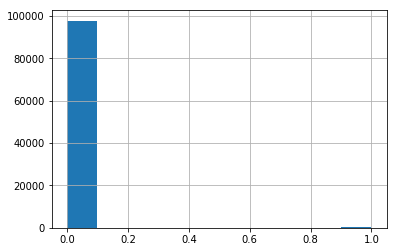

In [30]:
PRICE_mm_col.hist()

# Tips for Predictive Models
Z-score standardization is most useful for regression models, such as linear regression and logistic regression
Min-Max scaling is more relevant for algorithms that calculate distances between data points, such as K-Nearest Neighbors and K-Means Clustering